In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## Информация о продажах за 12 месяцев

In [2]:
dannie = {
    'Бумага': np.random.normal(400, 50, 12),
    'Карандаш': np.random.normal(50, 6, 12),
    'Ручка': np.random.normal(70, 15, 12),
    'Тетрадь': np.random.normal(60, 4, 12),
    'Файлик': np.random.normal(10, 2, 12),
    'Коробка': np.random.normal(100, 49, 12),
    'Фломастер': np.random.normal(34, 5, 12),
    'Скотч': np.random.normal(120, 10, 12),
    'Ножницы': np.random.normal(250, 10, 12),
    'Маркер': np.random.normal(49, 15, 12),
}

In [3]:
dannief = pd.DataFrame(dannie)
dannief

,Бумага,Карандаш,Ручка,Тетрадь,Файлик,Коробка,Фломастер,Скотч,Ножницы,Маркер
0,379.369411,41.429775,86.248089,61.872077,10.532781,164.778849,43.032863,115.882788,244.873633,80.153647
1,530.534569,42.099639,69.382978,60.949448,9.454469,93.993990,25.690371,136.969439,261.665442,57.006888
2,357.190162,56.506811,61.976262,58.098694,7.539260,99.595259,36.144496,114.573288,232.968859,57.111798
3,348.463276,50.713992,62.719538,59.711250,8.935053,124.777159,30.315549,113.538079,235.042465,40.456132
4,345.870135,45.077543,87.123308,62.183908,10.408008,120.786316,35.766781,123.499149,240.357655,47.799541
5,373.222767,49.734776,55.707293,60.740620,6.885030,119.974486,34.340903,120.904634,242.757602,35.304817
6,406.869007,55.308229,69.039671,62.386726,9.541734,88.845956,23.653418,123.170770,242.854270,40.635271
7,293.903529,54.463332,55.468960,63.861889,11.999090,75.735889,24.444151,110.125151,253.275743,43.241416
8,400.448649,51.212742,68.713686,66.445123,7.204692,-9.226051,34.972863,115.406754,267.904098,22.211765
9,409.996290,49.869027,78.643044,59.588795,10.994080,105.766924,30.740600,115.103298,242.219991,42.866949


## Обработка данных

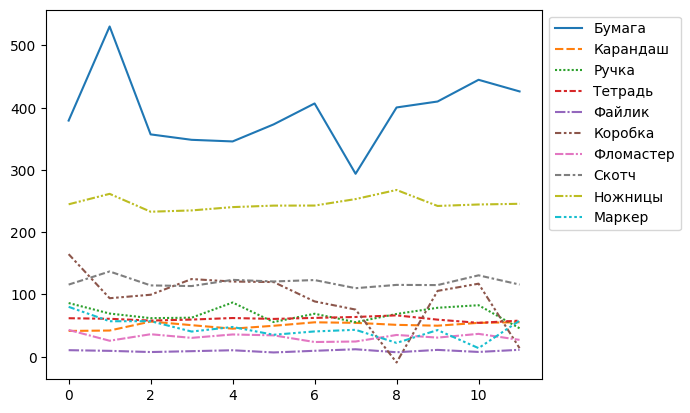

In [4]:
ax = sns.lineplot(dannief)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [5]:
p0 = dannief.sum() / dannief.shape[0]
p0

Бумага       393.079466
Карандаш      50.522604
Ручка         68.628354
Тетрадь       60.692329
Файлик         9.361190
Коробка       93.015737
Фломастер     31.912811
Скотч        119.656176
Ножницы      246.182304
Маркер        44.881234
dtype: float64

In [6]:
std = ((dannief - p0) ** 2).sum() / (dannief.shape[0] - 1)
std = std ** (1 / 2)
std

Бумага       59.643620
Карандаш      5.208088
Ручка        13.127077
Тетрадь       3.086727
Файлик        1.714797
Коробка      48.145368
Фломастер     5.913624
Скотч         7.821654
Ножницы      10.169275
Маркер       17.408347
dtype: float64

In [7]:
x_extrapol = p0 + np.random.normal(0, std, len(p0))
pd.concat([dannief, pd.DataFrame([x_extrapol], columns=x_extrapol.index)]).reset_index(drop=True)

,Бумага,Карандаш,Ручка,Тетрадь,Файлик,Коробка,Фломастер,Скотч,Ножницы,Маркер
0,379.369411,41.429775,86.248089,61.872077,10.532781,164.778849,43.032863,115.882788,244.873633,80.153647
1,530.534569,42.099639,69.382978,60.949448,9.454469,93.993990,25.690371,136.969439,261.665442,57.006888
2,357.190162,56.506811,61.976262,58.098694,7.539260,99.595259,36.144496,114.573288,232.968859,57.111798
3,348.463276,50.713992,62.719538,59.711250,8.935053,124.777159,30.315549,113.538079,235.042465,40.456132
4,345.870135,45.077543,87.123308,62.183908,10.408008,120.786316,35.766781,123.499149,240.357655,47.799541
5,373.222767,49.734776,55.707293,60.740620,6.885030,119.974486,34.340903,120.904634,242.757602,35.304817
6,406.869007,55.308229,69.039671,62.386726,9.541734,88.845956,23.653418,123.170770,242.854270,40.635271
7,293.903529,54.463332,55.468960,63.861889,11.999090,75.735889,24.444151,110.125151,253.275743,43.241416
8,400.448649,51.212742,68.713686,66.445123,7.204692,-9.226051,34.972863,115.406754,267.904098,22.211765
9,409.996290,49.869027,78.643044,59.588795,10.994080,105.766924,30.740600,115.103298,242.219991,42.866949


## Оценки

In [8]:
reliability = std / p0
reliability

Бумага       0.151734
Карандаш     0.103084
Ручка        0.191278
Тетрадь      0.050859
Файлик       0.183182
Коробка      0.517605
Фломастер    0.185306
Скотч        0.065368
Ножницы      0.041308
Маркер       0.387876
dtype: float64

### Уловие 1 $ X_i - \hat{p_0} < 2\hat{\sigma}: \forall i$

In [9]:
a1 = ((dannief - p0) < 2 * std).all()
a1

Бумага       False
Карандаш      True
Ручка         True
Тетрадь       True
Файлик        True
Коробка       True
Фломастер     True
Скотч        False
Ножницы      False
Маркер       False
dtype: bool

### Условие 2 $ \hat{p_0} > 2\hat{\sigma} $

In [10]:
a2 = p0 > 2 * std
a2

Бумага        True
Карандаш      True
Ручка         True
Тетрадь       True
Файлик        True
Коробка      False
Фломастер     True
Скотч         True
Ножницы       True
Маркер        True
dtype: bool

### Условие 3 $ X_i > 0: \forall i $

In [11]:
a3 = (dannief > 0).all()
a3

Бумага        True
Карандаш      True
Ручка         True
Тетрадь       True
Файлик        True
Коробка      False
Фломастер     True
Скотч         True
Ножницы       True
Маркер        True
dtype: bool

### Цветовая классификация

In [12]:
product_color = pd.Series(dtype='string')
for name in dannief.columns:
    if (not a3[name]):
        product_color[name] = 'Красный'
    elif (not a1[name] and not a2[name]):
        product_color[name] = 'Оранжевый'
    elif (not a1[name] or not a2[name]):
        product_color[name] = 'Желтый'
    else:
        product_color[name] = 'Зеленый'
product_color

Бумага        Желтый
Карандаш     Зеленый
Ручка        Зеленый
Тетрадь      Зеленый
Файлик       Зеленый
Коробка      Красный
Фломастер    Зеленый
Скотч         Желтый
Ножницы       Желтый
Маркер        Желтый
dtype: object